<h1 align=center> Data Science Project </h1>

**Task1:** Exploratory Data Analysis 

**Task2:** Predictive Model (predict the number of years' experience)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dtale # Automated EDA Library

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [4]:
### Using dtale to explore the dataset
dtale.show(df)

### Get to know each columns

In [5]:
df_des = pd.read_csv("survey_results_schema.csv")

for i in range(len(df_des)):
    print(f'{df_des["Column"][i]}=>{df_des["QuestionText"][i]}\n')

Respondent=>Randomized respondent ID number (not in order of survey response time)

MainBranch=>Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."

Hobbyist=>Do you code as a hobby?

Age=>What is your age (in years)? If you prefer not to answer, you may leave this question blank.

Age1stCode=>At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)

CompFreq=>Is that compensation weekly, monthly, or yearly?

CompTotal=>What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.

ConvertedComp=>Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 5

### Removing these columns:

* Respondent
* ConvertedComp
* CurrencyDesc
* CurrencySymbol
* SurveyEase 
* SurveyLength 
* WelcomeChange
* Ethnicity
* NEWJobHuntResearch
* JobFactors
* LanguageDesireNextYear
* CompTotal
* MiscTechWorkedWith
* MiscTechDesireNextYear
* NEWPurchaseResearch
* NEWJobHunt
* NEWStuck
* NEWSOSites
* Sexuality
* UndergradMajor
* OrgSize

In [6]:
df1 = df.drop(["Respondent","ConvertedComp","CurrencyDesc","CurrencySymbol","SurveyEase","SurveyLength","WelcomeChange","Ethnicity","NEWJobHuntResearch","JobFactors", "LanguageDesireNextYear","CompTotal","MiscTechWorkedWith","MiscTechDesireNextYear","NEWPurchaseResearch","NEWJobHunt", "NEWStuck","NEWSOSites", "Sexuality", "UndergradMajor", "OrgSize"], axis=1)
print(df.shape, df1.shape)

(64461, 61) (64461, 40)


## EDA And Feature Engineering

**Displaying null values**

In [7]:
df1.isnull().sum()

MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
Country                           389
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Gender                          13904
JobSat                          19267
JobSeek                         12734
LanguageWorkedWith               7083
NEWCollabToolsDesireNextYear    17174
NEWCollabToolsWorkedWith        11578
NEWDevOps                       21775
NEWDevOpsImpt                   22729
NEWEdImpt                       15996
NEWLearn                         8305
NEWOffTopic                     13657
NEWOnboardGood                  21838
NEWOtherComms                    7256
NEWOvertime                     21230
NEWPurpleLink                    9658
OpSys       

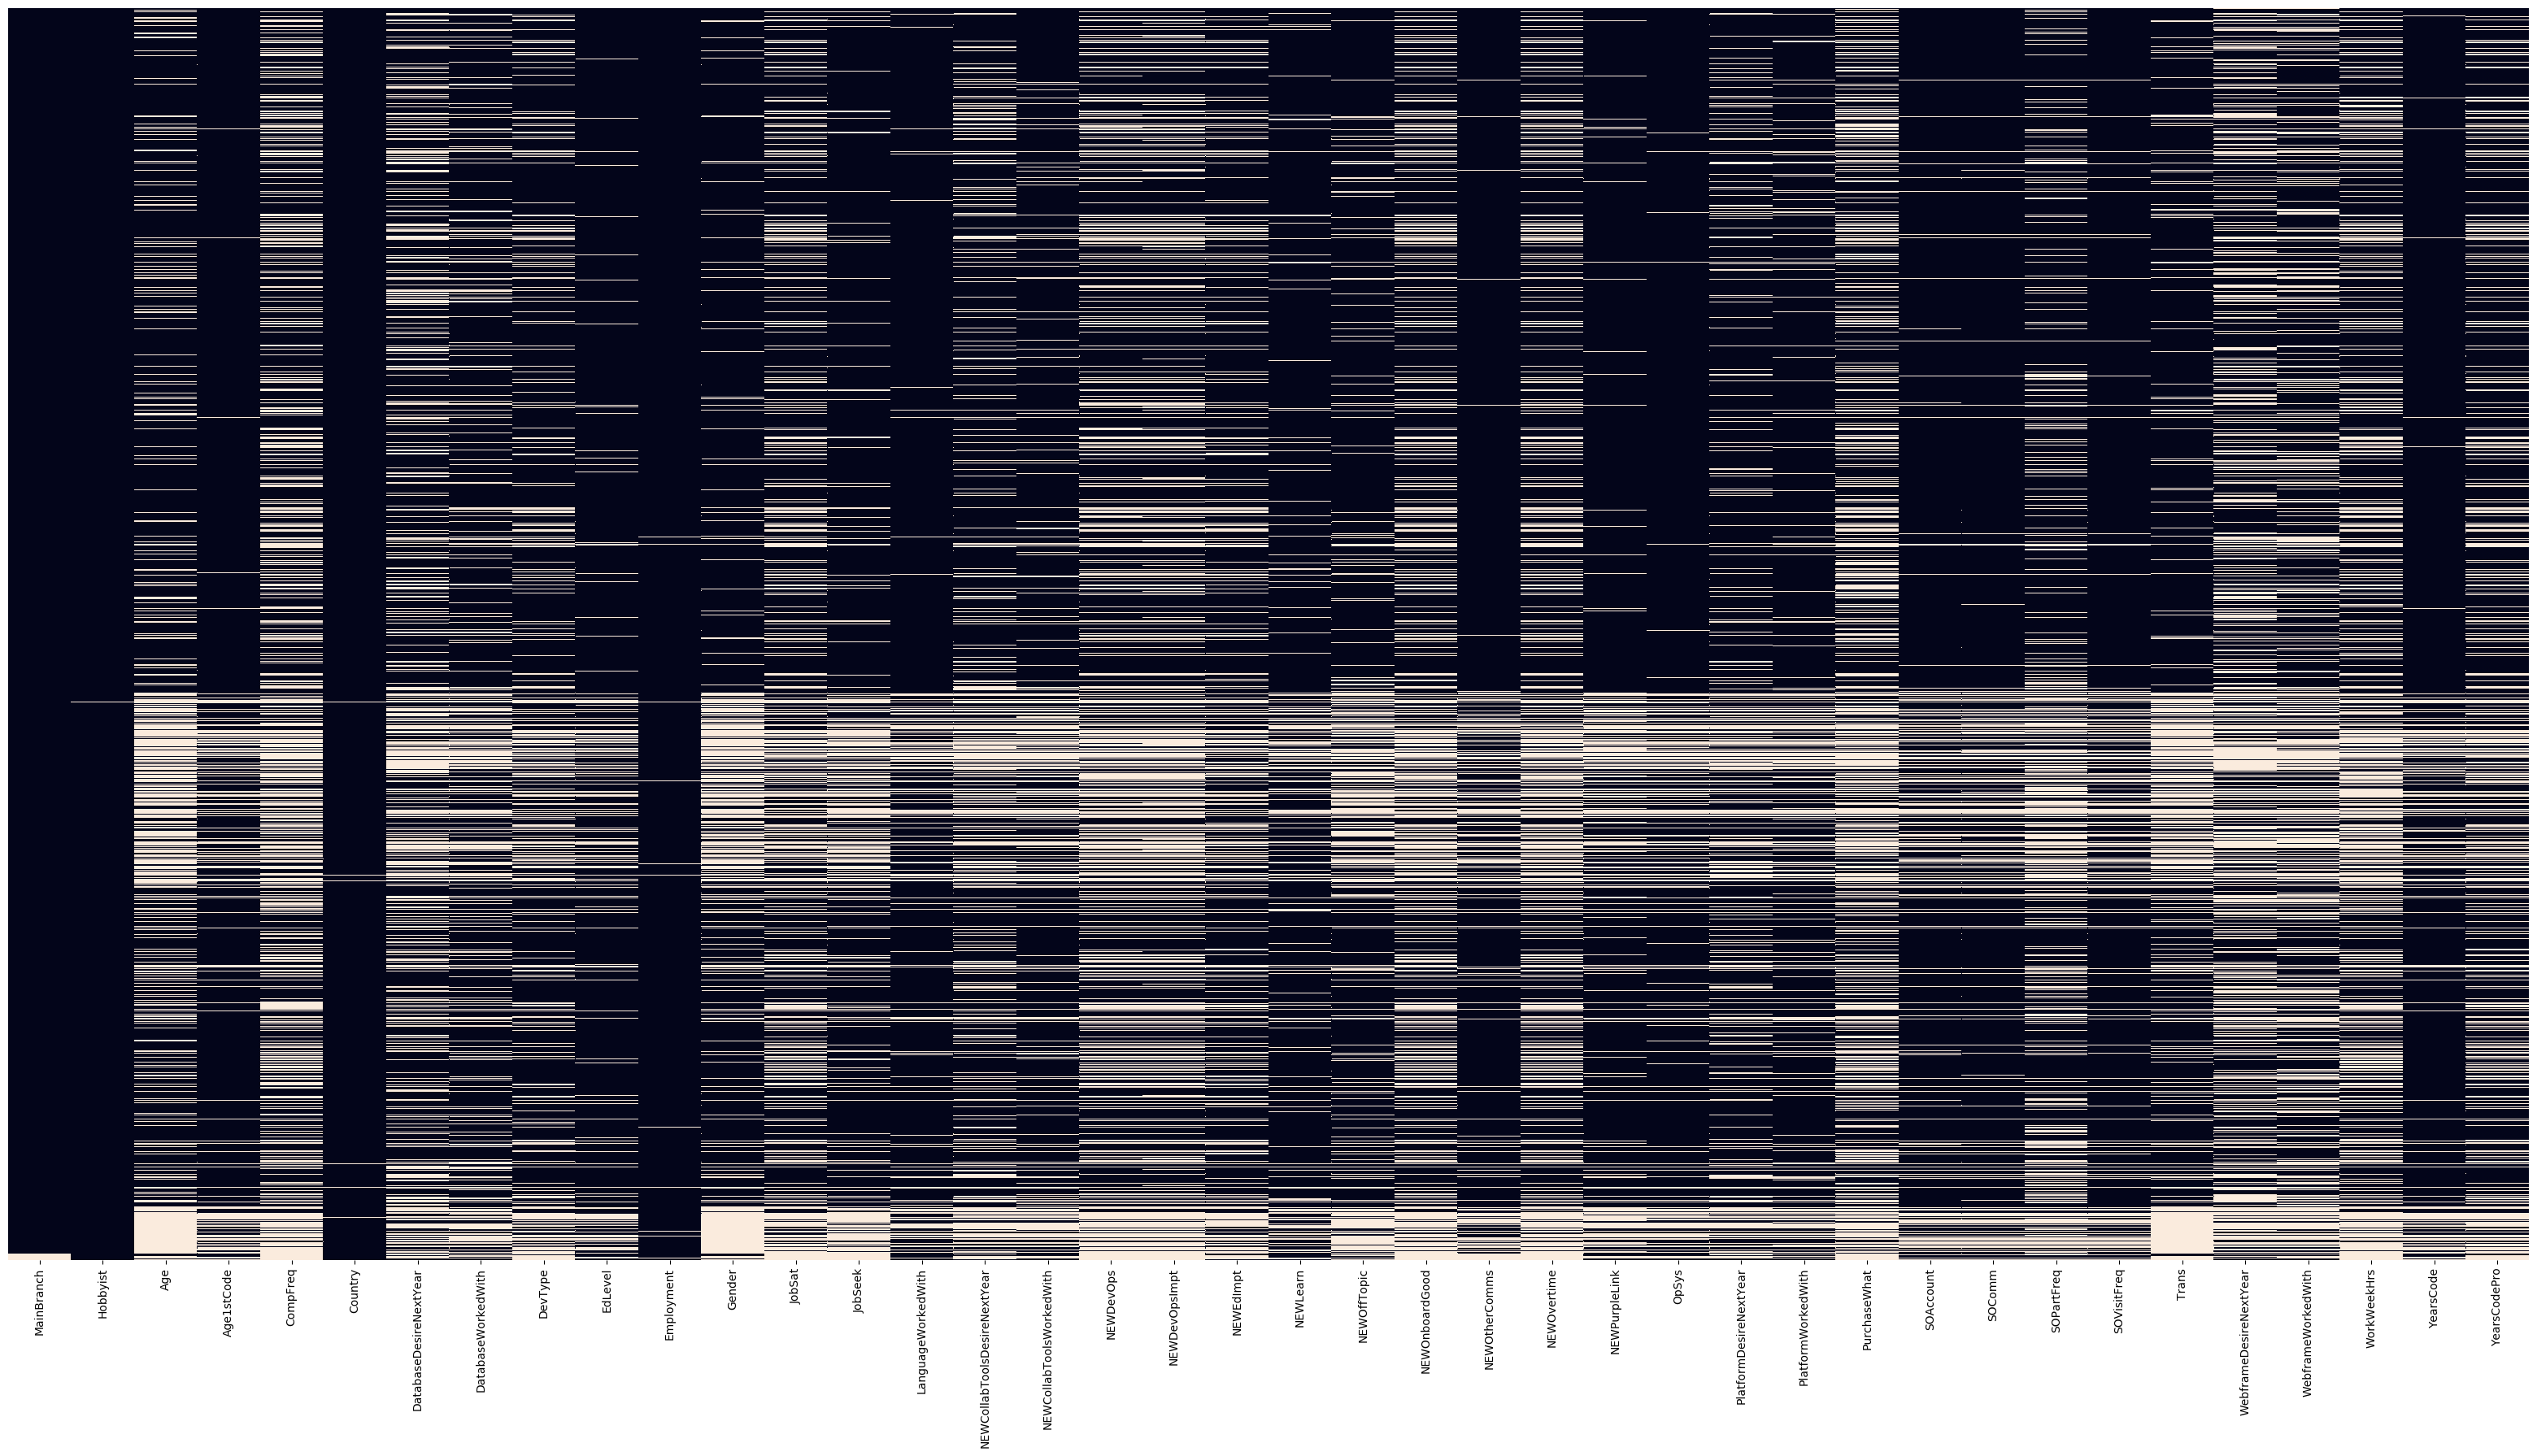

In [8]:
plt.figure(figsize=(40,20))
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False);

In [9]:
### Here we will check the percentage of nan values present in each feature
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df1[feature].isnull().mean(), 4),  ' % missing values')

MainBranch 0.0046  % missing values
Hobbyist 0.0007  % missing values
Age 0.295  % missing values
Age1stCode 0.1018  % missing values
CompFreq 0.3784  % missing values
Country 0.006  % missing values
DatabaseDesireNextYear 0.3163  % missing values
DatabaseWorkedWith 0.2315  % missing values
DevType 0.2341  % missing values
EdLevel 0.1091  % missing values
Employment 0.0094  % missing values
Gender 0.2157  % missing values
JobSat 0.2989  % missing values
JobSeek 0.1975  % missing values
LanguageWorkedWith 0.1099  % missing values
NEWCollabToolsDesireNextYear 0.2664  % missing values
NEWCollabToolsWorkedWith 0.1796  % missing values
NEWDevOps 0.3378  % missing values
NEWDevOpsImpt 0.3526  % missing values
NEWEdImpt 0.2482  % missing values
NEWLearn 0.1288  % missing values
NEWOffTopic 0.2119  % missing values
NEWOnboardGood 0.3388  % missing values
NEWOtherComms 0.1126  % missing values
NEWOvertime 0.3293  % missing values
NEWPurpleLink 0.1498  % missing values
OpSys 0.1277  % missing va

**Checking the data types**

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   CompFreq                      40069 non-null  object 
 5   Country                       64072 non-null  object 
 6   DatabaseDesireNextYear        44070 non-null  object 
 7   DatabaseWorkedWith            49537 non-null  object 
 8   DevType                       49370 non-null  object 
 9   EdLevel                       57431 non-null  object 
 10  Employment                    63854 non-null  object 
 11  Gender                        50557 non-null  object 
 12  JobSat                        45194 non-null  object 
 13  J

In [11]:
### get length of unique values, data type and display each column unique values
for col in df1.columns:
    print(f"'{col}': len of Unique {len(df1[col].unique())} having type *{df1[col].dtype}* has=> {df1[col].unique()} unique values\n")

'MainBranch': len of Unique 6 having type *object* has=> ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan] unique values

'Hobbyist': len of Unique 3 having type *object* has=> ['Yes' 'No' nan] unique values

'Age': len of Unique 111 having type *float64* has=> [  nan  25.   31.   36.   30.   22.   23.   49.   53.   27.   45.   32.
  24.   40.   18.   39.   29.   16.   34.   19.   35.   20.   38.   57.
  28.   17.   44.   21.   48.   26.   42.   55.   37.   50.   41.   64.
  63.   33.   43.   51.   60.   59.   62.   69.   52.   46.   49.5  56.
  47.   15.   72.   13.   71.   54.   70.   11.   14.   61.   26.8  86.
  58.   67.   94.   65.   66.   84.   73.   78.   68.   99.   74.   12.
  77.   15.5  85.   76.   35.7  32.5  81.   23.8  97.   96.   26.5   3.
  24.5  14.7  34.5   5.    1.   

'NEWEdImpt': len of Unique 6 having type *object* has=> ['Fairly important' nan 'Not at all important/not necessary'
 'Very important' 'Somewhat important' 'Critically important'] unique values

'NEWLearn': len of Unique 5 having type *object* has=> ['Once a year' 'Once a decade' 'Every few months' 'Once every few years'
 nan] unique values

'NEWOffTopic': len of Unique 4 having type *object* has=> ['Not sure' nan 'No' 'Yes'] unique values

'NEWOnboardGood': len of Unique 4 having type *object* has=> [nan 'Yes' 'No' 'Onboarding? What onboarding?'] unique values

'NEWOtherComms': len of Unique 3 having type *object* has=> ['No' 'Yes' nan] unique values

'NEWOvertime': len of Unique 6 having type *object* has=> ['Often: 1-2 days per week or more' nan
 'Occasionally: 1-2 days per quarter but less than monthly' 'Never'
 'Sometimes: 1-2 days per month but less than weekly'
 'Rarely: 1-2 days per year or less'] unique values

'NEWPurpleLink': len of Unique 5 having type *object* has=> ['Amus

In [12]:
### Converting to numeric
df1['Age1stCode'] = pd.to_numeric(df1['Age1stCode'],errors="coerce")
df1['YearsCodePro'] = pd.to_numeric(df1['YearsCodePro'],errors="coerce")
df1['YearsCode'] = pd.to_numeric(df1['YearsCode'],errors="coerce")

In [13]:
for col in df1.columns:
    print(f"'{col}': having type *{df1[col].dtype}* has=> {df1[col].unique()} unique values\n")

'MainBranch': having type *object* has=> ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan] unique values

'Hobbyist': having type *object* has=> ['Yes' 'No' nan] unique values

'Age': having type *float64* has=> [  nan  25.   31.   36.   30.   22.   23.   49.   53.   27.   45.   32.
  24.   40.   18.   39.   29.   16.   34.   19.   35.   20.   38.   57.
  28.   17.   44.   21.   48.   26.   42.   55.   37.   50.   41.   64.
  63.   33.   43.   51.   60.   59.   62.   69.   52.   46.   49.5  56.
  47.   15.   72.   13.   71.   54.   70.   11.   14.   61.   26.8  86.
  58.   67.   94.   65.   66.   84.   73.   78.   68.   99.   74.   12.
  77.   15.5  85.   76.   35.7  32.5  81.   23.8  97.   96.   26.5   3.
  24.5  14.7  34.5   5.    1.   20.5  79.  279.   22.5  27.5  32.8  10.
  89.   80

'WebframeWorkedWith': having type *object* has=> ['ASP.NET;ASP.NET Core' nan 'Ruby on Rails' ...
 'ASP.NET;ASP.NET Core;Flask;Gatsby;jQuery;React.js;Vue.js'
 'Angular;Angular.js;ASP.NET;ASP.NET Core;Django;Express;jQuery;Laravel;React.js;Ruby on Rails;Symfony'
 'ASP.NET;ASP.NET Core;Django;jQuery;Symfony;Vue.js'] unique values

'WorkWeekHrs': having type *float64* has=> [ 50.                  nan  40.          39.          36.
  45.          35.          42.          37.          30.
   5.          43.          60.          24.          25.
  16.          32.          38.          55.          20.
  70.          37.5         47.          44.          72.
   8.          12.          41.          90.          27.
  48.           4.          22.          80.          10.
  52.           8.5        120.           9.          15.
  39.5          6.          54.          40.5         46.
  18.         105.          42.5        375.          65.
  11.          56.          75.          49.   

**list of categorical variables**

In [14]:
cat_cols = [col for col in df1.columns if df1[col].dtype == 'object']

print('Number of cat variables: ', len(cat_cols))

### exploring unique contents of each column
for feature in cat_cols:
    print(f"{feature}, {df1[feature].unique()}\n")

Number of cat variables:  35
MainBranch, ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]

Hobbyist, ['Yes' 'No' nan]

CompFreq, ['Monthly' nan 'Yearly' 'Weekly']

Country, ['Germany' 'United Kingdom' 'Russian Federation' 'Albania' 'United States'
 'India' 'Tunisia' 'Spain' 'Netherlands' 'France' 'Belgium' 'Portugal'
 'Canada' 'China' 'Ukraine' 'Italy' 'Brazil' 'Austria' 'Mexico' 'Sweden'
 'Poland' 'Indonesia' 'Greece' 'Israel' 'Czech Republic'
 'Bosnia and Herzegovina' 'Bulgaria' 'Serbia' 'Switzerland' 'Hungary'
 'Nepal' 'Slovenia' 'Uruguay' 'Denmark' 'Pakistan' 'Taiwan' 'Romania'
 'Finland' 'Costa Rica' 'Nigeria' 'Chile' 'Turkey' 'Panama' 'Ireland'
 'Estonia' 'Philippines' 'Australia' 'Nomadic' 'Peru' 'Cyprus' 'Sri Lanka'
 'Kenya' 'Norway' 'Kyrgyzstan' 'Iran' 'Croatia' 'Egypt' 'Argent

**Replacing some values**

In [15]:
df1.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [16]:
df1.NEWOnboardGood.unique()

array([nan, 'Yes', 'No', 'Onboarding? What onboarding?'], dtype=object)

In [17]:
df1['Gender'].replace(to_replace={'Man;Non-binary, genderqueer, or gender non-conforming' :'Man' ,
                                  'Non-binary, genderqueer, or gender non-conforming' :'Other',
                                  'Woman;Non-binary, genderqueer, or gender non-conforming':'Woman',
                                  'Woman;Man;Non-binary, genderqueer, or gender non-conforming':'Other',
                                  'Woman;Man':'Other'},inplace=True)


df1['NEWOnboardGood'].replace(to_replace={'Onboarding? What onboarding?':'other'},inplace=True)


In [18]:
df1.Gender.unique(), df1.NEWOnboardGood.unique()

(array(['Man', nan, 'Woman', 'Other'], dtype=object),
 array([nan, 'Yes', 'No', 'other'], dtype=object))

**List of numerical variables**

In [19]:
num_cols = [col for col in df1.columns if df1[col].dtype != 'object']

print('Number of numerical variables: ', len(num_cols))
df1[num_cols].head()

Number of numerical variables:  5


,Age,Age1stCode,WorkWeekHrs,YearsCode,YearsCodePro
0,NaN,13.0,50.0,36.0,27.0
1,NaN,19.0,NaN,7.0,4.0
2,NaN,15.0,NaN,4.0,NaN
3,25.0,18.0,40.0,7.0,4.0
4,31.0,16.0,NaN,15.0,8.0


### Handling missing values

filling null values, we will use two methods, random sampling for higher null values and mean/mode sampling for lower null values



In [20]:
def random_value_imputation(feature):
    random_sample = df1[feature].dropna().sample(df1[feature].isna().sum())
    random_sample.index = df1[df1[feature].isnull()].index
    df1.loc[df1[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = df1[feature].mode()[0]
    df1[feature] =df[feature].fillna(mode)

In [21]:
df1[num_cols].isnull().sum()

Age             19015
Age1stCode       6988
WorkWeekHrs     23310
YearsCode        7677
YearsCodePro    20328
dtype: int64

In [22]:
for col in num_cols:
    random_value_imputation(col)

### display num_cols    
df1[num_cols].isnull().sum()

Age             0
Age1stCode      0
WorkWeekHrs     0
YearsCode       0
YearsCodePro    0
dtype: int64

In [23]:
for col in cat_cols:
    impute_mode(col)
    
### display cat_cols
df1[cat_cols].isnull().sum()

MainBranch                      0
Hobbyist                        0
CompFreq                        0
Country                         0
DatabaseDesireNextYear          0
DatabaseWorkedWith              0
DevType                         0
EdLevel                         0
Employment                      0
Gender                          0
JobSat                          0
JobSeek                         0
LanguageWorkedWith              0
NEWCollabToolsDesireNextYear    0
NEWCollabToolsWorkedWith        0
NEWDevOps                       0
NEWDevOpsImpt                   0
NEWEdImpt                       0
NEWLearn                        0
NEWOffTopic                     0
NEWOnboardGood                  0
NEWOtherComms                   0
NEWOvertime                     0
NEWPurpleLink                   0
OpSys                           0
PlatformDesireNextYear          0
PlatformWorkedWith              0
PurchaseWhat                    0
SOAccount                       0
SOComm        

In [24]:
for col in cat_cols:
    print(f"'{col}': len of Unique {len(df1[col].unique())} => {df1[col].unique()} unique values\n")

'MainBranch': len of Unique 5 => ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code'] unique values

'Hobbyist': len of Unique 2 => ['Yes' 'No'] unique values

'CompFreq': len of Unique 3 => ['Monthly' 'Yearly' 'Weekly'] unique values

'Country': len of Unique 183 => ['Germany' 'United Kingdom' 'Russian Federation' 'Albania' 'United States'
 'India' 'Tunisia' 'Spain' 'Netherlands' 'France' 'Belgium' 'Portugal'
 'Canada' 'China' 'Ukraine' 'Italy' 'Brazil' 'Austria' 'Mexico' 'Sweden'
 'Poland' 'Indonesia' 'Greece' 'Israel' 'Czech Republic'
 'Bosnia and Herzegovina' 'Bulgaria' 'Serbia' 'Switzerland' 'Hungary'
 'Nepal' 'Slovenia' 'Uruguay' 'Denmark' 'Pakistan' 'Taiwan' 'Romania'
 'Finland' 'Costa Rica' 'Nigeria' 'Chile' 'Turkey' 'Panama' 'Ireland'
 'Estonia' 'Philippines' 'Australia' 'Nomadic' 'Per

### In some columns it is good to get only the most common values (Dimensionality Reduction)
* WebframeWorkedWith
* WebframeDesireNextYear
* PlatformDesireNextYear
* NEWCollabToolsWorkedWith
* NEWCollabToolsDesireNextYear
* LanguageWorkedWith
* DevType 
* DatabaseWorkedWith 
* DatabaseDesireNextYear 
* Country

In [25]:
def Dim_red(df,
            col,
            lst_most:list):
    '''
    This function getting dataframe, name of the feature and the list of the most values as input!
    '''
    
    df[col] = df[col].apply(lambda x: 'Other' if x in lst_most else x)
    #print(df[col])

**Any location not in the 10 most country should be tagged as "other" location. This way number of categories can be reduced by huge amount.**

In [26]:
locations = df1['Country'].value_counts(ascending=False)
locations[:10]

United States     12858
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
France             1898
Brazil             1818
Netherlands        1343
Poland             1278
Australia          1208
Name: Country, dtype: int64

In [27]:
locations_10 = locations[locations<1200]
locations_10

Spain                 1161
Italy                 1117
Russian Federation    1092
Sweden                 886
Pakistan               809
                      ... 
Kiribati                 1
Nauru                    1
Lesotho                  1
Saint Lucia              1
Marshall Islands         1
Name: Country, Length: 173, dtype: int64

In [28]:
Dim_red(df=df1, col="Country",lst_most=locations_10)
df1.Country.unique()

array(['Germany', 'United Kingdom', 'Other', 'United States', 'India',
       'Netherlands', 'France', 'Canada', 'Brazil', 'Poland', 'Australia'],
      dtype=object)

**Getting DatabaseDesireNextYear most common values**

In [29]:
DatabaseDesireNextYear = df1['DatabaseDesireNextYear'].value_counts(ascending=False)
DatabaseDesireNextYear[:10]

PostgreSQL              22701
Microsoft SQL Server     1947
MySQL                    1823
MongoDB                  1624
SQLite                    966
Firebase                  901
PostgreSQL;Redis          787
PostgreSQL;SQLite         689
MongoDB;MySQL             667
MongoDB;PostgreSQL        576
Name: DatabaseDesireNextYear, dtype: int64

In [30]:
Dim_red(df1,"DatabaseDesireNextYear",DatabaseDesireNextYear[DatabaseDesireNextYear<576])
df1.DatabaseDesireNextYear.unique()

array(['Microsoft SQL Server', 'PostgreSQL', 'Other', 'MongoDB',
       'PostgreSQL;SQLite', 'MongoDB;MySQL', 'MySQL', 'PostgreSQL;Redis',
       'SQLite', 'MongoDB;PostgreSQL', 'Firebase'], dtype=object)

**DatabaseWorkedWith**

In [31]:
DatabaseWorkedWith = df1['DatabaseWorkedWith'].value_counts(ascending=False)
DatabaseWorkedWith[:7]

MySQL                         18751
Microsoft SQL Server           3298
PostgreSQL                     1937
SQLite                         1313
Microsoft SQL Server;MySQL     1158
MySQL;SQLite                   1080
MongoDB                         975
Name: DatabaseWorkedWith, dtype: int64

In [32]:
Dim_red(df1,"DatabaseWorkedWith",DatabaseWorkedWith[DatabaseWorkedWith<975])
df1.DatabaseWorkedWith.unique()

array(['Other', 'MySQL', 'Microsoft SQL Server', 'PostgreSQL',
       'MySQL;SQLite', 'SQLite', 'MongoDB', 'Microsoft SQL Server;MySQL'],
      dtype=object)

**DevType**

In [33]:
DevType = df1['DevType'].value_counts(ascending=False)
DevType[:10]

Developer, full-stack                                                                                           19515
Developer, back-end                                                                                              3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                   2227
Developer, back-end;Developer, full-stack                                                                        1476
Developer, front-end                                                                                             1401
Developer, mobile                                                                                                1251
Developer, front-end;Developer, full-stack                                                                        830
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack      813
Developer, back-end;Developer, desktop or enterprise app

In [34]:
Dim_red(df1,"DevType",DevType[DevType<606])
df1.DevType.unique()

array(['Other', 'Developer, full-stack', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, back-end;Developer, full-stack',
       'Developer, front-end',
       'Developer, back-end;Developer, front-end;Developer, full-stack',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack',
       'Developer, mobile', 'Developer, front-end;Developer, full-stack',
       'Developer, back-end;Developer, desktop or enterprise applications'],
      dtype=object)

**LanguageWorkedWith**

In [35]:
LanguageWorkedWith = df1['LanguageWorkedWith'].value_counts(ascending=False)
LanguageWorkedWith[:10]

HTML/CSS;JavaScript;PHP;SQL              8156
HTML/CSS;JavaScript                       900
C#;HTML/CSS;JavaScript;SQL                856
C#;HTML/CSS;JavaScript;SQL;TypeScript     754
HTML/CSS;JavaScript;TypeScript            697
Python                                    651
Java                                      575
HTML/CSS;JavaScript;PHP                   525
C#                                        416
HTML/CSS;Java;JavaScript;SQL              391
Name: LanguageWorkedWith, dtype: int64

In [36]:
Dim_red(df1,"LanguageWorkedWith",LanguageWorkedWith[LanguageWorkedWith<391])
df1.LanguageWorkedWith.unique()

array(['Other', 'HTML/CSS;JavaScript;PHP;SQL', 'HTML/CSS;JavaScript;PHP',
       'HTML/CSS;JavaScript', 'HTML/CSS;JavaScript;TypeScript', 'Python',
       'C#;HTML/CSS;JavaScript;SQL',
       'C#;HTML/CSS;JavaScript;SQL;TypeScript',
       'HTML/CSS;Java;JavaScript;SQL', 'Java', 'C#'], dtype=object)

**NEWCollabToolsDesireNextYear**

In [37]:
NEWCollabToolsDesireNextYear = df1['NEWCollabToolsDesireNextYear'].value_counts(ascending=False)
NEWCollabToolsDesireNextYear[:10]

Github                                                         21906
Github;Gitlab                                                   2026
Github;Slack                                                    1762
Github;Slack;Google Suite (Docs, Meet, etc)                     1376
Github;Google Suite (Docs, Meet, etc)                           1151
Gitlab                                                          1104
Github;Gitlab;Slack                                              934
Confluence;Jira;Github;Slack                                     674
Github;Slack;Trello;Google Suite (Docs, Meet, etc)               652
Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)      613
Name: NEWCollabToolsDesireNextYear, dtype: int64

In [38]:
Dim_red(df1,"NEWCollabToolsDesireNextYear",NEWCollabToolsDesireNextYear[NEWCollabToolsDesireNextYear<613])
df1.NEWCollabToolsDesireNextYear.unique()

array(['Other', 'Github;Slack', 'Github',
       'Github;Google Suite (Docs, Meet, etc)', 'Github;Gitlab',
       'Github;Slack;Google Suite (Docs, Meet, etc)',
       'Github;Gitlab;Slack', 'Gitlab', 'Confluence;Jira;Github;Slack',
       'Github;Slack;Trello;Google Suite (Docs, Meet, etc)',
       'Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)'],
      dtype=object)

**NEWCollabToolsWorkedWith**

In [39]:
NEWCollabToolsWorkedWith = df1['NEWCollabToolsWorkedWith'].value_counts(ascending=False)
NEWCollabToolsWorkedWith[:10]

Github                                                                       15921
Github;Gitlab                                                                 1525
Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)                   1287
Github;Google Suite (Docs, Meet, etc)                                         1217
Github;Slack                                                                  1208
Github;Slack;Google Suite (Docs, Meet, etc)                                   1069
Confluence;Jira;Github;Slack                                                  1003
Github;Slack;Trello;Google Suite (Docs, Meet, etc)                             840
Confluence;Jira;Github;Gitlab;Slack;Google Suite (Docs, Meet, etc)             754
Confluence;Jira;Github;Gitlab;Slack;Trello;Google Suite (Docs, Meet, etc)      751
Name: NEWCollabToolsWorkedWith, dtype: int64

In [40]:
Dim_red(df1,"NEWCollabToolsWorkedWith",NEWCollabToolsWorkedWith[NEWCollabToolsWorkedWith<751])
df1.NEWCollabToolsWorkedWith.unique()

array(['Other', 'Github',
       'Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)',
       'Github;Slack;Trello;Google Suite (Docs, Meet, etc)',
       'Github;Slack', 'Confluence;Jira;Github;Slack', 'Github;Gitlab',
       'Github;Slack;Google Suite (Docs, Meet, etc)',
       'Confluence;Jira;Github;Gitlab;Slack;Trello;Google Suite (Docs, Meet, etc)',
       'Confluence;Jira;Github;Gitlab;Slack;Google Suite (Docs, Meet, etc)',
       'Github;Google Suite (Docs, Meet, etc)'], dtype=object)

**PlatformDesireNextYear**

In [41]:
PlatformDesireNextYear = df1['PlatformDesireNextYear'].value_counts(ascending=False)
PlatformDesireNextYear[:10]

Linux                          15867
Windows                         1747
Linux;Windows                   1126
Android                          823
Docker;Linux                     784
AWS                              544
Docker;Kubernetes;Linux          514
Android;iOS                      512
Microsoft Azure;Windows          495
AWS;Docker;Kubernetes;Linux      492
Name: PlatformDesireNextYear, dtype: int64

In [42]:
Dim_red(df1,"PlatformDesireNextYear",PlatformDesireNextYear[PlatformDesireNextYear<492])
df1.PlatformDesireNextYear.unique()

array(['Other', 'Linux', 'Android', 'Docker;Linux', 'Windows',
       'Linux;Windows', 'Microsoft Azure;Windows',
       'Docker;Kubernetes;Linux', 'AWS', 'AWS;Docker;Kubernetes;Linux',
       'Android;iOS'], dtype=object)

**WebframeDesireNextYear**

In [43]:
WebframeDesireNextYear = df1['WebframeDesireNextYear'].value_counts(ascending=False)
WebframeDesireNextYear[:10]

React.js            26917
ASP.NET Core         1106
Vue.js               1079
Spring               1011
Express;React.js      899
Django                872
Flask                 803
React.js;Vue.js       762
Angular               716
jQuery                687
Name: WebframeDesireNextYear, dtype: int64

In [44]:
Dim_red(df1,"WebframeDesireNextYear",WebframeDesireNextYear[WebframeDesireNextYear<687])
df1.WebframeDesireNextYear.unique()

array(['ASP.NET Core', 'React.js', 'Other', 'Spring', 'Flask',
       'Express;React.js', 'Vue.js', 'jQuery', 'Django', 'Angular',
       'React.js;Vue.js'], dtype=object)

**WebframeWorkedWith**

In [45]:
WebframeWorkedWith = df1['WebframeWorkedWith'].value_counts(ascending=False)
WebframeWorkedWith[:10]

jQuery                         24261
React.js                        1917
Spring                          1350
Flask                           1074
Django                           920
Express;React.js                 916
ASP.NET                          820
ASP.NET;ASP.NET Core             819
ASP.NET;ASP.NET Core;jQuery      792
Angular                          725
Name: WebframeWorkedWith, dtype: int64

In [46]:
Dim_red(df1,"WebframeWorkedWith",WebframeWorkedWith[WebframeWorkedWith<725])
df1.WebframeWorkedWith.unique()

array(['ASP.NET;ASP.NET Core', 'jQuery', 'Other', 'Flask',
       'Express;React.js', 'ASP.NET', 'Angular', 'Django', 'React.js',
       'Spring', 'ASP.NET;ASP.NET Core;jQuery'], dtype=object)

### Labeling the features

In [47]:
encode = LabelEncoder()

for col in cat_cols:
    df1[col]=encode.fit_transform(df1[col])

In [48]:
df1.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,...,SOAccount,SOComm,SOPartFreq,SOVisitFreq,Trans,WebframeDesireNextYear,WebframeWorkedWith,WorkWeekHrs,YearsCode,YearsCodePro
0,0,1,24.0,13.0,0,4,1,5,10,3,...,0,1,4,5,0,0,1,50.0,36.0,27.0
1,0,0,28.0,19.0,2,9,7,3,10,1,...,2,4,4,5,0,6,10,40.0,7.0,4.0
2,3,1,30.0,15.0,2,7,7,3,8,1,...,2,5,0,2,0,6,10,80.0,4.0,2.0
3,0,1,25.0,18.0,2,7,7,3,8,3,...,2,4,0,5,0,6,10,40.0,7.0,4.0
4,4,1,31.0,16.0,2,10,6,5,8,1,...,2,5,4,0,0,5,7,45.0,15.0,8.0


In [49]:
for col in cat_cols:
    print(f'{col} {df1[col].unique()}')

MainBranch [0 3 4 2 1]
Hobbyist [1 0]
CompFreq [0 2 1]
Country [ 4  9  7 10  5  6  3  2  1  8  0]
DatabaseDesireNextYear [ 1  7  6  2  9  3  5  8 10  4  0]
DatabaseWorkedWith [5 3 0 6 4 7 2 1]
DevType [10  8  0  5  4  6  3  2  9  7  1]
EdLevel [3 1 7 6 8 0 4 5 2]
Employment [2 0 6 4 1 5 3]
Gender [0 3 1 2 6 5 4]
JobSat [2 3 4 1 0]
JobSeek [1 2 0]
LanguageWorkedWith [ 9  6  5  4  7 10  1  2  3  8  0]
NEWCollabToolsDesireNextYear [10  6  2  5  3  7  4  9  0  8  1]
NEWCollabToolsWorkedWith [10  4  3  9  7  2  5  8  1  0  6]
NEWDevOps [0 2 1]
NEWDevOpsImpt [4 0 1 2 3]
NEWEdImpt [1 2 4 3 0]
NEWLearn [2 1 0 3]
NEWOffTopic [1 0 2]
NEWOnboardGood [2 0 1]
NEWOtherComms [0 1]
NEWOvertime [2 4 1 0 3]
NEWPurpleLink [0 2 1 3]
OpSys [3 2 1 0]
PlatformDesireNextYear [ 9  6  2  5 10  7  8  4  0  1  3]
PlatformWorkedWith [6219 6222  665 ... 3875 2838  847]
PurchaseWhat [1 0 2]
SOAccount [0 2 1]
SOComm [1 4 5 2 0 3]
SOPartFreq [4 0 5 3 1 2]
SOVisitFreq [5 2 0 1 3 4]
Trans [0 1]
WebframeDesireNextYear [ 

In [50]:
### saving dataset
df2 = df1.copy()
df2.to_csv("dataset.csv")

## Using Dtale to check distributions and outliers

In [51]:
dtale.show(df2)

## Feature selection

In [52]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = df2.drop(['YearsCode'], axis=1)
y = df2['YearsCode']

feature_sel_model = SelectFromModel(Lasso(alpha=0.05, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [53]:
feature_sel_model.get_support()

array([False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True])

In [54]:
# let's print the number of total and selected features

selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 39
selected features: 30


In [55]:
selected_feat

Index(['Age', 'Age1stCode', 'CompFreq', 'Country', 'DatabaseDesireNextYear',
       'DevType', 'EdLevel', 'Employment', 'Gender', 'JobSeek',
       'LanguageWorkedWith', 'NEWCollabToolsDesireNextYear',
       'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'OpSys', 'PlatformDesireNextYear', 'PlatformWorkedWith',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'WebframeWorkedWith',
       'WorkWeekHrs', 'YearsCodePro'],
      dtype='object')

In [56]:
X_data = df2[['Age', 'Age1stCode', 'CompFreq', 'Country', 'DatabaseDesireNextYear',
       'DevType', 'EdLevel', 'Employment', 'Gender', 'JobSeek',
       'LanguageWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOffTopic',
       'NEWOnboardGood', 'NEWOvertime', 'OpSys', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'SOAccount', 'SOComm', 'SOPartFreq',
       'SOVisitFreq', 'WebframeWorkedWith', 'WorkWeekHrs', 'YearsCodePro']]
y_data = df2.YearsCode

In [57]:
X_data.shape

(64461, 29)

## Model training

### split the dataset

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

X_train.shape, y_train.shape

((48345, 29), (48345,))

### Create the model

In [67]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
model.score(X_test, y_test)

0.6312109793317185